In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine,load_digits
from sklearn.model_selection import train_test_split
import random
from umap.umap_ import UMAP

from sklearn.cluster import AgglomerativeClustering
import Score
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import pdist, squareform
from sklearn.metrics import pairwise_distances
import EnsembleUMAP as eu

d:\appdata\Miniconda\envs\tf\lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
d:\appdata\Miniconda\envs\tf\lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
d:\appdata\Miniconda\envs\tf\lib\site-packages\umap\distances.py:1086: NumbaDeprecationWarning: The 'nop

In [2]:
Dataset = pd.read_csv(r'../../Dataset/DM.csv')
Dataset = Dataset.set_index('Unnamed: 0')
Dataset = Dataset[Dataset['DM_status'] == 1]
Dataset['Second.DIASTOLIC.reading'] = Dataset['Second.DIASTOLIC.reading'].astype('float')
Dataset['Third.DIASTOLIC.reading']  = Dataset['Third.DIASTOLIC.reading'].astype('float')
Dataset = (Dataset - Dataset.min()) / (Dataset.max() - Dataset.min())
Dataset = Dataset.drop(['DM_status'] , axis = 1)

C:\Users\hp\AppData\Local\Temp\ipykernel_1356\2892941841.py:1: DtypeWarning: Columns (13,15) have mixed types. Specify dtype option on import or set low_memory=False.
  Dataset = pd.read_csv(r'../../Dataset/DM.csv')


In [3]:
Dataset

,Current.age,Sex,Currently.has.asthma,Currently.has.thyroid.disorder,Currently.has.heart.disease,Currently.has.cancer,Suffers.from.TB,SBP_status,First.SYSTOLIC.reading,First.DIASTOLIC.reading,...,Has.bicycle,Has.motorcycle.scooter,Has.car.truck,Type.of.cooking.fuel,Household.structure,Owns.livestock..herds.or.farm.animals,Source.of.drinking.water,Time.to.get.to.water.source..minutes.,Glucose.level,DM_history
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
4,0.666667,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.414286,0.366516,...,0.0,0.0,0.0,1.00,0.0,0.0,0.75,0.005525,0.110317,1.0
53,0.589744,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.514286,0.402715,...,0.0,1.0,0.0,0.75,0.0,1.0,0.75,0.005525,0.122574,1.0
59,0.820513,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.447619,0.402715,...,1.0,1.0,1.0,0.75,0.0,0.0,0.75,0.005525,0.262513,1.0
81,0.871795,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.514286,0.393665,...,0.0,1.0,1.0,0.75,0.0,0.0,0.75,0.005525,0.087845,1.0
120,0.282051,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.390476,0.307692,...,0.0,1.0,1.0,0.25,0.0,0.0,0.75,0.005525,0.118488,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
810462,0.615385,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.433333,0.411765,...,1.0,1.0,0.0,0.75,0.0,0.0,0.75,0.005525,0.419816,1.0
810568,0.897436,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.414286,0.407240,...,1.0,1.0,1.0,0.25,0.0,0.0,0.75,0.005525,0.113381,1.0
810673,0.794872,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.528571,0.371041,...,0.0,1.0,0.0,0.75,0.0,0.0,0.75,0.005525,0.159346,1.0


In [4]:
Continous = [
    'First.SYSTOLIC.reading' ,
    'First.DIASTOLIC.reading' ,
    'Second.SYSTOLIC.reading' ,
    'Second.DIASTOLIC.reading' ,
    'Third.SYSTOLIC.reading' ,
    'Third.DIASTOLIC.reading' ,
    'BMI' ,
    'Hemoglobin.level..g.dl...1.decimal.' ,
    'Hb_adjust_alt_smok' ,
    'Time.to.get.to.water.source..minutes.' ,
    'Glucose.level' ,

]
Nominal = [
    'Sex' ,
    'Currently.has.asthma' ,
    'Currently.has.thyroid.disorder' ,
    'Currently.has.heart.disease' ,
    'Currently.has.cancer' ,
    'Suffers.from.TB' ,
    'SBP_status' ,
    'Currently.taking.a.prescribed.medicine.to.lower.BP' ,
    'Hb_status' ,
    'Drinks.alcohol' ,
    'Type.of.alcohol.usually.consumed..Tadi.madi' ,
    'Type.of.alcohol.usually.consumed..country.liquor' ,
    'Type.of.alcohol.usually.consumed..beer' ,
    'Type.of.alcohol.usually.consumed..wine' ,
    'Type.of.alcohol.usually.consumed..hard.liquor' ,
    'Smoking_stat' ,
    'Type.of.place.of.residence' ,
    'Household.head.s.religion' ,
    'Type.of.caste.or.tribe.of.the.household.head' ,
    'Has.refrigerator' ,
    'Has.bicycle' ,
    'Has.motorcycle.scooter' ,
    'Has.car.truck' ,
    'Type.of.cooking.fuel' ,
    'Household.structure' ,
    'Owns.livestock..herds.or.farm.animals' ,
    'Source.of.drinking.water' ,
    'DM_history'
]
Ordinal = [
    'Current.age',
    'Frequency.takes.milk.or.curd' ,
    'Frequency.eats.pulses.or.beans' ,
    'Frequency.eats.dark.green.leafy.vegetable' ,
    'Frequency.eats.fruits' ,
    'Frequency.eats.eggs' ,
    'Frequency.eats.fish' ,
    'Frequency.eats.chicken.or.meat' ,
    'Frequency.eats.fried.food' ,
    'Frequency.takes.aerated.drinks' ,
    'Frequency.household.members.smoke.inside.the.house' ,
    'Wealth.index' ,
    'Highest.educational.level' ,
]
OutputSpace = [ 2 , 2 , 2]
Metrics = ['euclidean' , 'hamming' , 'canberra']
FeatureClasses = [Continous , Nominal , Ordinal]

In [10]:
NDSpace = eu.EnsembleUMAP(DataSet = Dataset , FeatureClasses = FeatureClasses , Metrics = Metrics , LatentSpaces = OutputSpace , seed = 45 , MinDistance = 0.15 , Neibhours = 45)
NDSpace = (NDSpace - NDSpace.min()) / (NDSpace.max() - NDSpace.min())
D2Space = eu.UMAP(DataSet = NDSpace , Neibhours = 30 , MinDistance = 0.15 , Metric = 'euclidean' ,  seed = 45)
D2Space = (D2Space - D2Space.min()) / (D2Space.max() - D2Space.min())
D2Space = pd.DataFrame(D2Space , columns = ['UMAP1' , 'UMAP2'])

Training Model	: 1
Training Model	: 2


d:\appdata\Miniconda\envs\tf\lib\site-packages\umap\umap_.py:1802: UserWarning: gradient function is not yet implemented for hamming distance metric; inverse_transform will be unavailable
  warn(


Training Model	: 3


d:\appdata\Miniconda\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


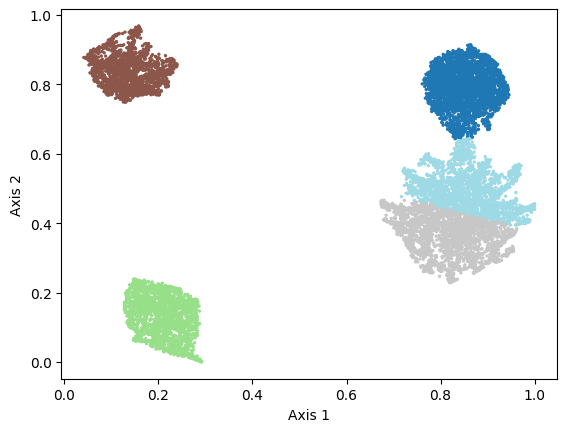

Dunn Index		:  0.05272497926325506
Silhouette Score	:  0.0019493598571970689
PScore			:  76.92307692307693
NClusters		:  5


d:\appdata\Miniconda\envs\tf\lib\site-packages\scipy\stats\_stats_py.py:3895: ConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(stats.ConstantInputWarning(msg))


Dunn Index		:  0.19661693283494883
Silhouette Score	:  0.05922329341016937
PScore			:  76.92307692307693
NClusters		:  5


d:\appdata\Miniconda\envs\tf\lib\site-packages\scipy\stats\_stats_py.py:3895: ConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(stats.ConstantInputWarning(msg))


In [35]:
Cluster = KMeans(n_clusters = 5 , random_state = 45 , algorithm = 'elkan' , init = 'k-means++').fit_predict(D2Space)
Score.Visualize2D(D2Space , Labels = Cluster)
Score.TriScore(Dataset = Dataset , Labels = Cluster)
Score.TriScore(Dataset = Dataset , Labels = Cluster)

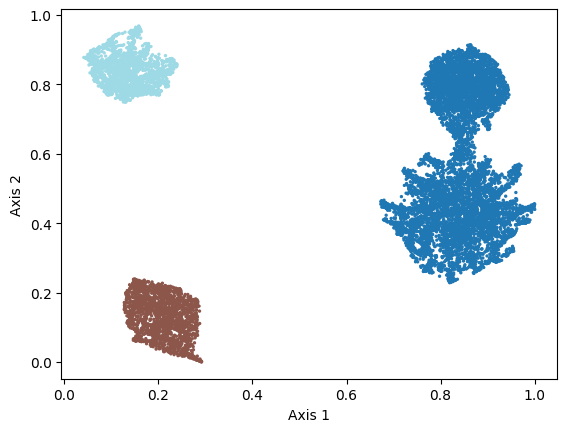

Dunn Index		:  0.16639353015748787
Silhouette Score	:  -0.05911541150104586
PScore			:  78.84615384615384
NClusters		:  3


d:\appdata\Miniconda\envs\tf\lib\site-packages\scipy\stats\_stats_py.py:3895: ConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(stats.ConstantInputWarning(msg))


Dunn Index		:  0.20827933882198577
Silhouette Score	:  0.06431312742229338
PScore			:  78.84615384615384
NClusters		:  3


d:\appdata\Miniconda\envs\tf\lib\site-packages\scipy\stats\_stats_py.py:3895: ConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(stats.ConstantInputWarning(msg))


In [36]:
Cluster = DBSCAN(eps = 0.2 , min_samples = 7).fit_predict(D2Space)
Score.Visualize2D(D2Space , Labels = Cluster)
Score.TriScore(Dataset = Dataset , Labels = Cluster)
Score.TriScore(Dataset = Dataset , Labels = Cluster)

d:\appdata\Miniconda\envs\tf\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


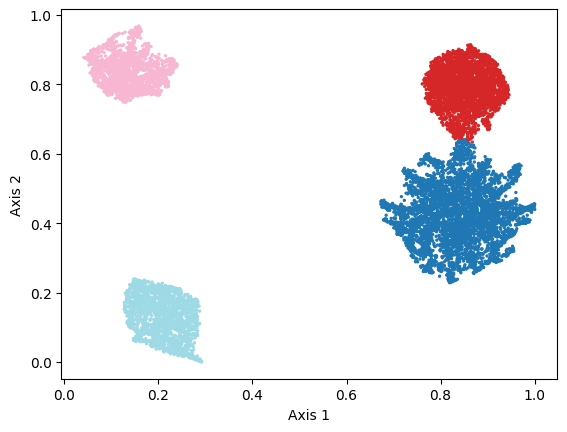

Dunn Index		:  0.08107853139683427
Silhouette Score	:  0.04763599237464527
PScore			:  76.92307692307693
NClusters		:  4


d:\appdata\Miniconda\envs\tf\lib\site-packages\scipy\stats\_stats_py.py:3895: ConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(stats.ConstantInputWarning(msg))


Dunn Index		:  0.19880986005621404
Silhouette Score	:  0.059877795587704785
PScore			:  76.92307692307693
NClusters		:  4


d:\appdata\Miniconda\envs\tf\lib\site-packages\scipy\stats\_stats_py.py:3895: ConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(stats.ConstantInputWarning(msg))


In [42]:
Cluster = AgglomerativeClustering(n_clusters = 4 , affinity = 'euclidean' , linkage = 'ward').fit_predict(D2Space)
Score.Visualize2D(D2Space , Labels = Cluster)
Score.TriScore(Dataset = Dataset , Labels = Cluster)
Score.TriScore(Dataset = Dataset , Labels = Cluster)

d:\appdata\Miniconda\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


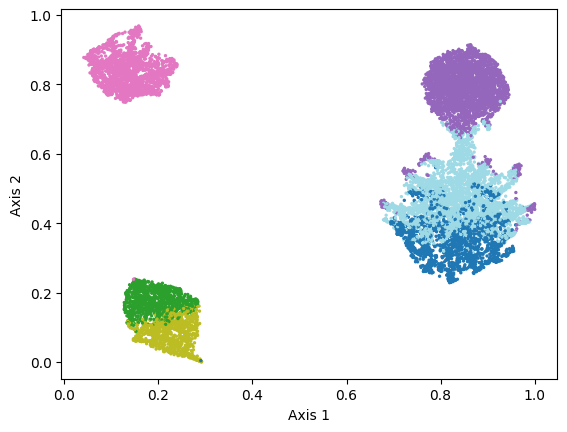

Dunn Index		:  0.06165451929285746
Silhouette Score	:  -0.013338872047387896
PScore			:  78.84615384615384
NClusters		:  6


d:\appdata\Miniconda\envs\tf\lib\site-packages\scipy\stats\_stats_py.py:3895: ConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(stats.ConstantInputWarning(msg))


Dunn Index		:  0.20852454534661077
Silhouette Score	:  0.06074727533409938
PScore			:  78.84615384615384
NClusters		:  6


d:\appdata\Miniconda\envs\tf\lib\site-packages\scipy\stats\_stats_py.py:3895: ConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(stats.ConstantInputWarning(msg))


In [47]:
Cluster = KMeans(n_clusters = 6 , random_state = 0 , algorithm = 'elkan').fit_predict(NDSpace)
Score.Visualize2D(D2Space , Labels = Cluster)
Score.TriScore(Dataset = Dataset , Labels = Cluster)
Score.TriScore(Dataset = Dataset , Labels = Cluster)

In [48]:
def Elbow(data , start = 2 , end = 11):
    from sklearn.cluster import KMeans
    import matplotlib.pyplot as plt

    # Assume 'data' is your dataset
    inertia = []
    for k in range(start, end):
        kmeans = KMeans(n_clusters = k, init='k-means++', random_state = 0)
        kmeans.fit(data)
        inertia.append(kmeans.inertia_)

    # Plotting the Elbow Method
    plt.plot(range(start, end), inertia, marker='o')
    plt.title('Elbow Method for Optimal k')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia')
    plt.show()

In [49]:
def SilhoetteAverage(data , start = 2 , end = 11) :
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_score
    silhouette_scores = []
    for k in range(start, end):
        kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
        kmeans.fit(data)
        score = silhouette_score(data, kmeans.labels_)
        score = silhouette_score(data, kmeans.labels_)
        silhouette_scores.append(score)

    # Plotting Silhouette Scores
    plt.plot(range(start, end), silhouette_scores, marker='o')
    plt.title('Silhouette Score for Optimal k')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.show()

Cluster = DBSCAN(eps = 1 , min_samples = 7).fit_predict(NDSpace)
Score.Visualize2D(D2Space , Labels = Cluster)
Score.TriScore(Dataset = Dataset , Labels = Cluster)
Score.TriScore(Dataset = Dataset , Labels = Cluster)

d:\appdata\Miniconda\envs\tf\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


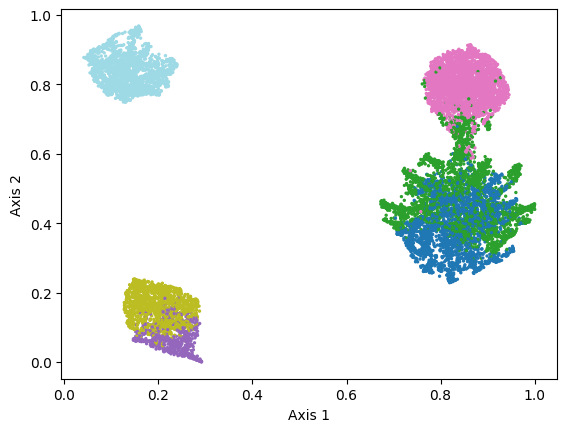

Dunn Index		:  0.018319989757975712
Silhouette Score	:  -0.06361438843095353
PScore			:  75.0
NClusters		:  6


d:\appdata\Miniconda\envs\tf\lib\site-packages\scipy\stats\_stats_py.py:3895: ConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(stats.ConstantInputWarning(msg))


Dunn Index		:  0.20322639604191076
Silhouette Score	:  0.06058216472130582
PScore			:  75.0
NClusters		:  6


d:\appdata\Miniconda\envs\tf\lib\site-packages\scipy\stats\_stats_py.py:3895: ConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(stats.ConstantInputWarning(msg))


In [50]:
Cluster = AgglomerativeClustering(n_clusters = 6 , affinity = 'euclidean' , linkage = 'ward').fit_predict(NDSpace)
Score.Visualize2D(D2Space , Labels = Cluster)
Score.TriScore(Dataset = Dataset , Labels = Cluster)
Score.TriScore(Dataset = Dataset , Labels = Cluster)